# `wisesight-sentiment` Data Exploration by [@lukkiddd](https://github.com/lukkiddd)

This notebook perform an exploration of the `wisesight-sentiment` dataset which was provided by **Wisesight (Thailand) Co., Ltd**. It contains 24,063 texts with 4 categories (`q`uestion, `neg`ative, `neu`tral, and `pos`itive) for training set and 2,674 texts for test set. For more detail about the data you can read `README.md` at https://github.com/PyThaiNLP/wisesight-sentiment .
    
- Word length distribution
- TF-IDF
    - Words
    - Emojis
    - Punctuations
    - URLs
    - Hashtags

In [1]:
import re

import pandas as pd

from pathlib import Path

from pythainlp.tokenize import word_tokenize
from tqdm import tqdm_notebook

# For visualization
import seaborn as sns

from matplotlib import pyplot as plt

# params
pd.set_option("max_colwidth", 0)
sns.set_context("talk")
sns.set_palette(sns.color_palette("colorblind", 10))

%matplotlib inline

In [2]:
# Thai font is needed
# Copy thsarabunnew-webfont.ttf to the notebook directory

# snippet to install Thai font in matplotlib from https://gist.github.com/korakot/9d7f5db632351dc92607fdec72a4953f
import matplotlib

# !wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !cp thsarabunnew-webfont.ttf /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
# !cp thsarabunnew-webfont.ttf /usr/share/fonts/truetype/

matplotlib.font_manager._rebuild()
matplotlib.rc("font", family="TH Sarabun New")

# Reading data

In [3]:
# Set data path
data_folder = Path("kaggle-competition/")

In [4]:
# Generate _train.csv from traint.txt and train_label.txt
texts = []
labels = []

with open(data_folder / "train.txt") as f:
    for line in f:
        texts.append(line.strip())

with open(data_folder / "train_label.txt") as f:
    for line in f:
        labels.append(line.strip())

df = pd.DataFrame({ "category": labels, "texts": texts })
del texts
del labels

df.to_csv("_train.csv", index=False)
df.shape

(24063, 2)

In [5]:
# Generate _test.csv from test.txt, use "neu" as the only class
texts = []
labels = []

with open(data_folder / "test.txt") as f:
    for line in f:
        texts.append(line.strip())

test_df = pd.DataFrame({ "category": "neu", "texts": texts })
del texts
del labels

test_df.to_csv("_test.csv", index=False)
test_df.shape

(2674, 2)

In [6]:
df.describe()

,category,texts
count,24063,24063
unique,4,24014
top,neu,#ERROR!
freq,13105,31


In [7]:
df.groupby("category").describe()

texts         \
          count unique   
category                 
neg       6140   6129    
neu       13105  13087   
pos       4300   4300    
q         518    518     

                                                                            
                                                                  top freq  
category                                                                    
neg       #ERROR!                                                      12   
neu       #ERROR!                                                      19   
pos       กระบะก็คือกระบะราคาขนาดนี้ซื้อฟอร์จูนเนอร์ดีกว่าสวยกว่าเยอะ  1    
q         เครื่องสำอางค์ etude ดีไหมคะถ้าไปเกาหลีแนะนำหน่อยค่ะ         1

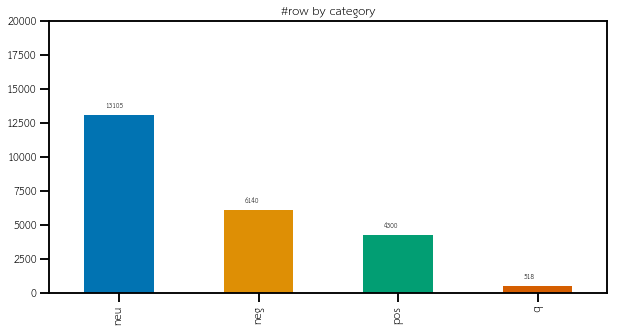

In [8]:
row_count_by_category = df.category.value_counts()
ax = row_count_by_category.plot("bar", title="#row by category", figsize=(10, 5))
ax.set_ylim(0, 20000)
for i, label in enumerate(row_count_by_category):
    ax.annotate(str(label), (i-0.1, label + 500))

# Text length

In [9]:
df["length"] = df["texts"].apply(word_tokenize).apply(len)
df.head()

,category,texts,length
0,neu,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ,13
1,neu,คะ,1
2,neg,อิเหี้ยออมทำกูอยากกินเอ็มเค,9
3,neu,😅😅😅,1
4,neu,สวัสดีวันพุธ แนน อะไรนะ,8


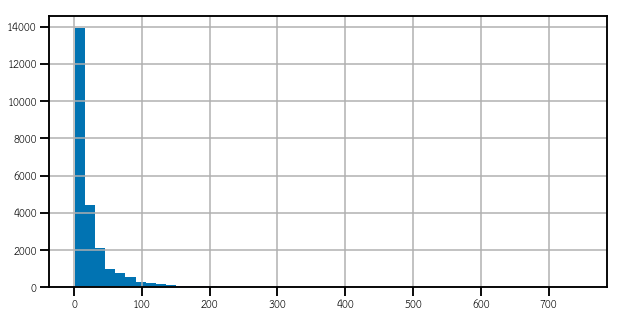

In [10]:
df["length"].hist(bins=50, figsize=(10, 5))

In [11]:
df["length"].describe()

count    24063.000000
mean     26.974775   
std      44.567452   
min      1.000000    
25%      6.000000    
50%      12.000000   
75%      29.000000   
max      749.000000  
Name: length, dtype: float64

In [12]:
df[df["length"] >= 749]

,category,texts,length
5889,neu,"และงานใหญ่ประจำปี บ้ตร sold out ทุกปี - ขายบัตรแล้ว!! พร้อมเพิ่มวง LIPTA - ถึงเวลารวม ชนเผ่า Johnnie Walker present 20Something On The Beach 2018 ""ชน เผ่า เมา เต้น"" ▶ THAITANIUM ▶ UrboyTJ ▶ COCKTAIL ▶ MILD ▶ LIPTA ▶ MUSKETEERS X BETTERWEATHER ▶ บริษัทฮาไม่จำกัด (บอล,ค่อม,ตั๊ก,โรเบิร์ต สายควัน) ▶ Dj Taidy Dj MMM Mc YongHulk ▶ GiraffNoi / RAVEN DOLL PARTY แบบ nonstop ไม่มี dead air DJ สลับ ศิลปินตลอดงาน @The Zign pattaya Sat 03/03/2018 16.00 - until late AGE : 18+ Dress Code : ชนเผ่า ----------------------------------------------- งานแบ่งเป็น 2 zone * Zone Regular : อยู่ด้านหลังไม่ติดเวที มีโต๊ะให้บางส่วน ไม่มีการจอง มาก่อนได้ก่อน ไม่ได้มีพอกับทุกคน เข้า zone vip ไม่ได้ (บัตรทุกราคา free mixer all night) * Regular Ticket - Pre sale : 900 ฿ - Door sale : 1,200 ฿ * Regular Package : 4,900฿ (ไม่มีบุ๊คโต๊ะ ไปก่อนได้ก่อน) - ห้องพัก the zign 1 ห้อง - บัตร regular 2 ใบ - บัตรอาหารเช้า 2 ท่าน — *Zone VIP : อยู่ด้านหน้าติดเวที Zone นี้ทุกโต๊ะจะต้องจองเท่านั้น สำหรับคนที่ ซื้อบัตร vip แยกเป็นใบๆ ต้องมีเพื่อนจองโต๊ะแล้วเท่านั้น ไม่งั้นเข้าไป คุณจะไม่มีโต๊ะ * VIP Ticket (limited) - 1,500 ฿ * VIP Package A : 15,000 ฿ (มีบุ๊คโต๊ะ) - ห้องพัก the zign 1 ห้อง - บัตร vip 4 ใบ - Whisky Johnnie Walker Blenders’ Batch 2 ขวด - Reserve table + VIP toilet - เด็กเสริฟ เครื่องดื่ม - Free mix all night - บัตรอาหารเช้า 2 ท่าน * VIP Package B : 12,000 ฿ (มีบุ๊คโต๊ะ) (สำหรับคนไม่เอาห้อง) - บัตร vip 4 ใบ - Whisky Johnnie Walker Blenders’ Batch - Reserve table + VIP toilet - เด็กเสริฟ เครื่องดื่ม - Free mix all night * VIP Package C : 6,100 ฿ (ไม่มีบุ๊คโต๊ะ) (สำหรับคนที่เพื่อนซื้อโต๊ะแล้ว) - ห้องพัก the zign 1 ห้อง - บัตร vip 2 ใบ - VIP toilet - เด็กเสริฟ เครื่องดื่ม - Free mix all night - บัตรอาหารเช้า 2 ท่าน ----------------------------------------------- ซื้อบัตรคลิก : http://go.eventpop.me/20STHONTHEBEACH2018 ซื้อบัตรกับทางร้าน (เฉพาะโต๊ะ vip zone ครึ่งหลัง) LINE@20sth : https://goo.gl/ujgAK4 Party by ""20STH TEAM"" #20somethingonthebeach2018 #20somethingonthebeach #ชนเผ่าเมาเต้น",749


### Word length distribution

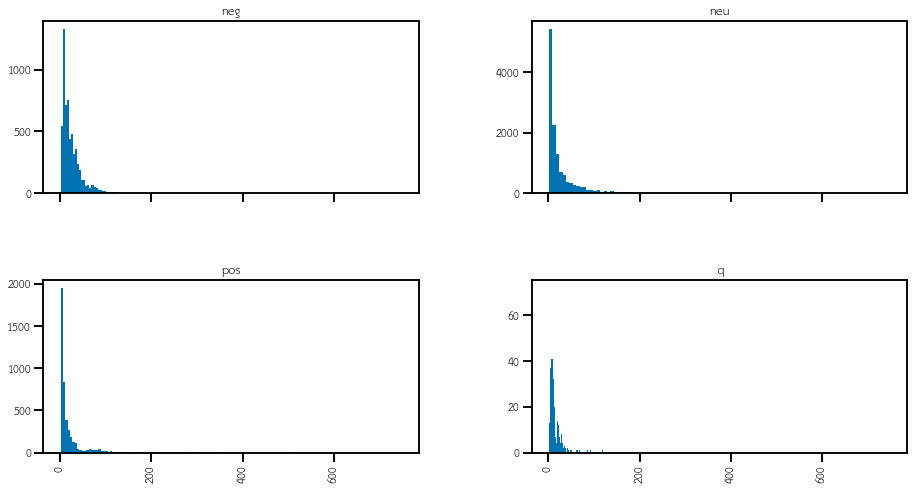

In [13]:
df.hist(column="length", by="category", bins=100, figsize=(15,8), sharex=True)
plt.show()

### Word length distribution (< 100)

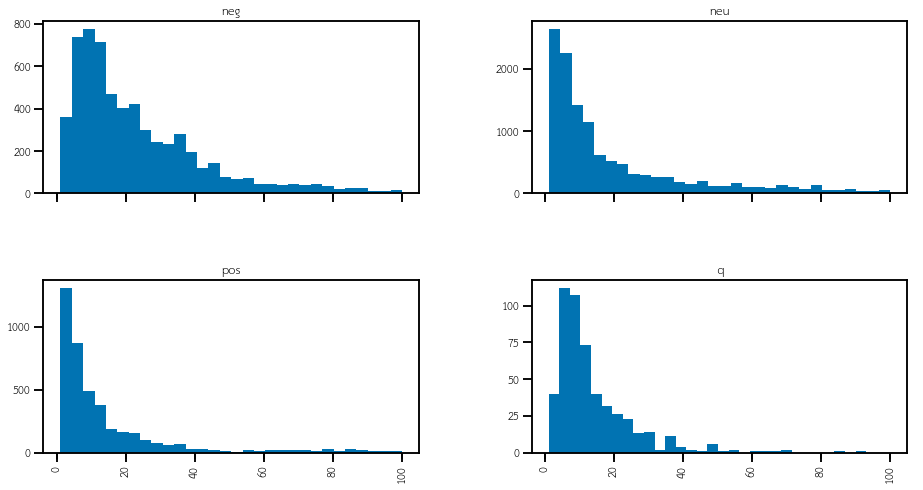

In [14]:
df[df["length"] <= 100].hist(column="length", by="category", bins=30, figsize=(15,8), sharex=True)
plt.show()

# Preprocess

In [15]:
def top_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''

    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ["feature", "score"]

    return df

In [16]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''

    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)

    return top_feats(tfidf_means, features, top_n)

In [17]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''

    dfs = []
    labels = np.unique(y)

    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)

    return dfs

In [18]:
def plot_classfeats_h(dfs, score_name=''):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''

    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))

    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel(f"Mean {score_name} Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        ax.invert_yaxis()
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)

    plt.show()

In [19]:
def show_classfeats(df, vectorizer, analyzer, score_name='', text_col='texts', class_col='category', is_emoji=False):
    vec = vectorizer(analyzer=analyzer)
    mat = vec.fit_transform(df[text_col])
    dfs = top_feats_by_class(mat, df[class_col], vec.get_feature_names())

    if is_emoji:
        for dataframe in dfs:
            dataframe.columns = [dataframe.label, 'tfidf_' + dataframe.label]
        return pd.concat(dfs, axis=1)
    else:
        plot_classfeats_h(dfs, score_name=score_name)

In [20]:
import string
import emoji
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [word for word in word_tokenize(nopunc) if word and not re.search(pattern=r"\s+", string=word)]

def extract_url(text):
    URL_PATTERN = r"(https?:\/\/)?\.([\da-z-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\S"
    return [url[1] for url in re.findall(pattern=URL_PATTERN, string=text.lower())]

def extract_emojis(str):
    return [c for c in str if c in emoji.UNICODE_EMOJI]

def extract_punc(text):
    return [char for char in text if char in string.punctuation]

def extract_hashtags(text):
    HASHTAG_PATTERN = r"#[a-zA-Z0-9ก-๙]+"
    return re.findall(pattern=HASHTAG_PATTERN, string=text)

## TF-IDF

### Words

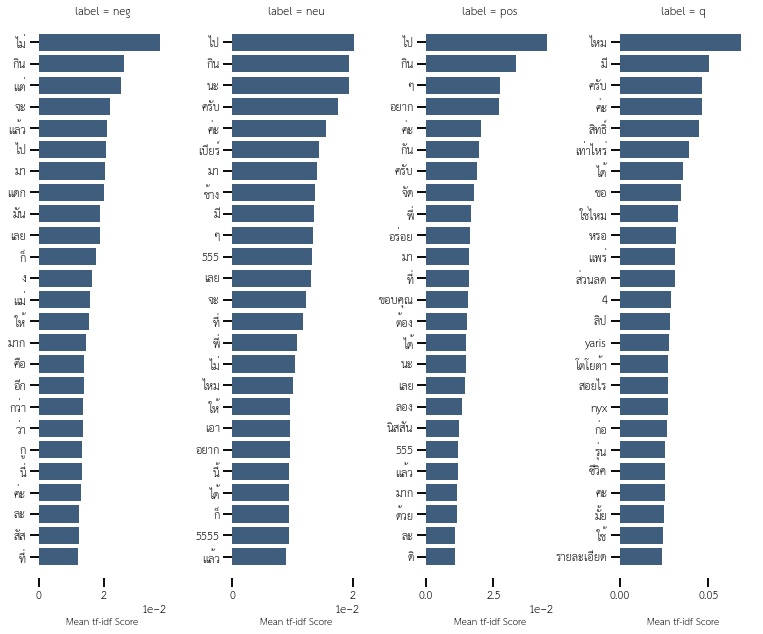

In [21]:
show_classfeats(
    df=df[:1000],
    vectorizer=TfidfVectorizer,
    analyzer=process_text,
    score_name="tf-idf",
)

### Emojis

In [22]:
show_classfeats(df=df, vectorizer=TfidfVectorizer, score_name="tf-idf", analyzer=extract_emojis, is_emoji=True)

,neg,tfidf_neg,neu,tfidf_neu,pos,tfidf_pos,q,tfidf_q
0,😂,0.017554,😂,0.007708,😂,0.013105,😂,0.006542
1,😭,0.010723,😍,0.004401,😍,0.010567,😍,0.003861
2,🤣,0.003469,❤,0.003310,😁,0.007697,🤔,0.003861
3,😅,0.003061,😁,0.003216,😘,0.006383,😭,0.003709
4,😢,0.002805,👉,0.003026,❤,0.005394,👀,0.001931
5,🙄,0.002556,😊,0.002896,😋,0.004721,😋,0.001931
6,😡,0.002063,🤣,0.002881,😊,0.004373,😙,0.001931
7,😁,0.002024,🙏,0.002638,😆,0.003711,😩,0.001931
8,😑,0.001852,📍,0.002265,🤤,0.003680,😮,0.001931
9,😒,0.001602,😅,0.002217,👍,0.003612,🏄,0.000000


### Punctuations

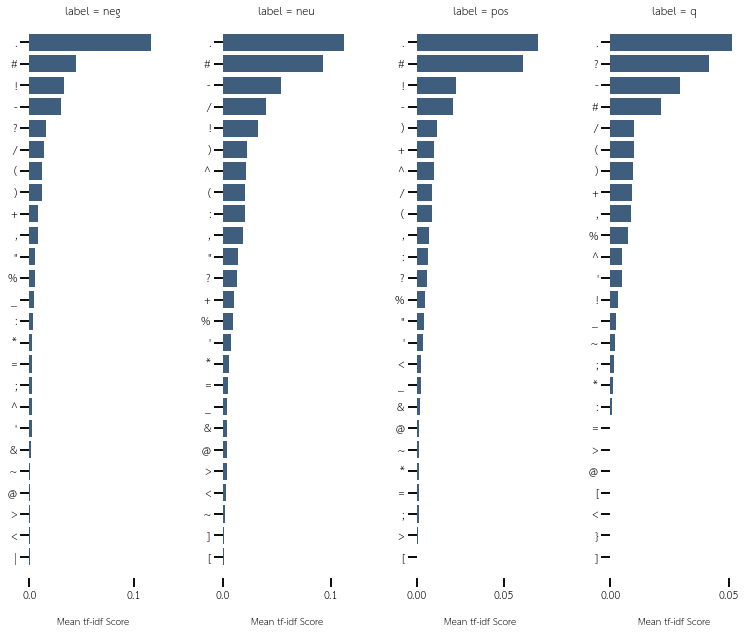

In [23]:
show_classfeats(df=df, vectorizer=TfidfVectorizer, score_name="tf-idf", analyzer=extract_punc)

### URLs

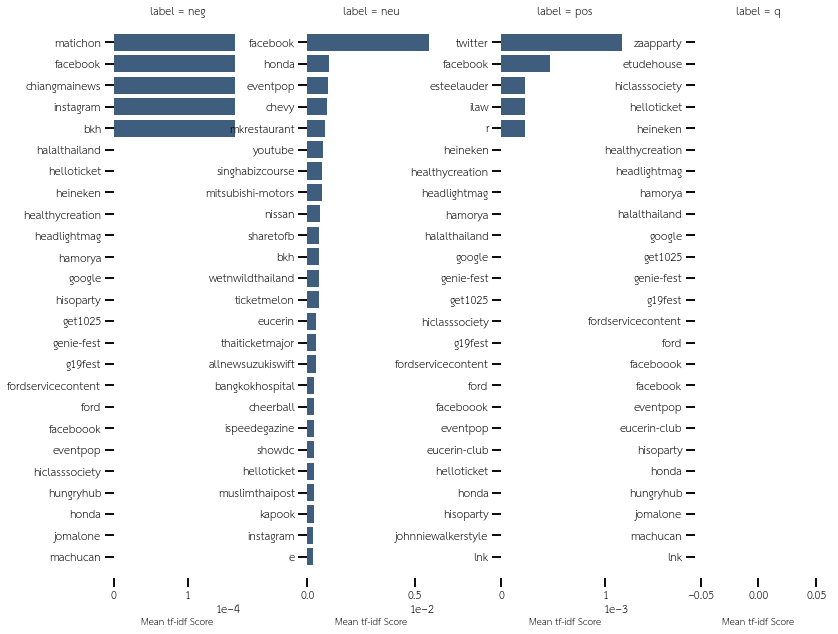

In [24]:
show_classfeats(df=df, vectorizer=TfidfVectorizer, score_name="tf-idf", analyzer=extract_url)

### Hashtags

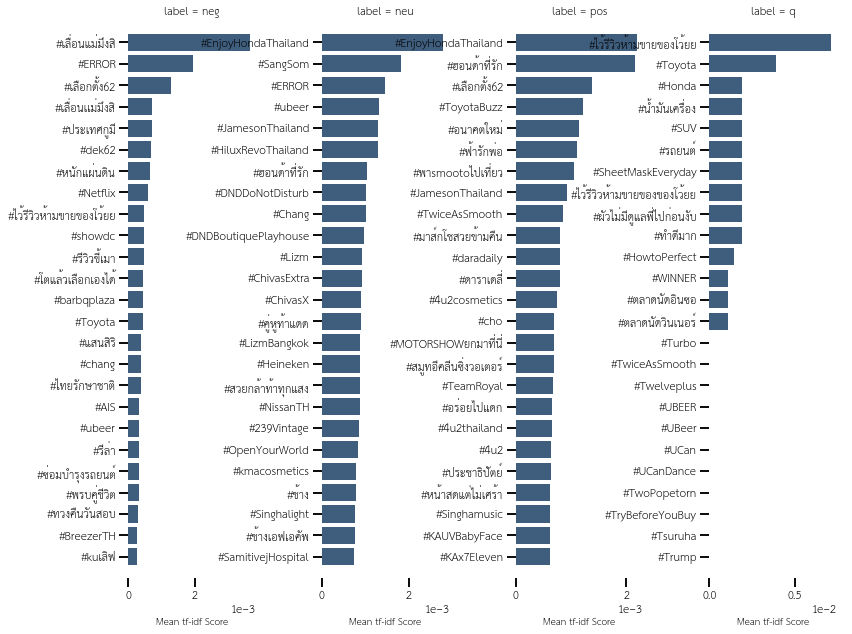

In [25]:
show_classfeats(df=df, vectorizer=TfidfVectorizer, score_name="tf-idf", analyzer=extract_hashtags)

# Neutral, Positive, Negative

In [26]:
neu_df = df[df.category == "neu"].sample(5000)
neu_df.head()

,category,texts,length
22810,neu,เค้าก็ขาย Everest กับ Ranger รัวๆไงครับ เพียงแต่ตอนนี้คนขยาดกับเก๋งฟอร์ด,22
15475,neu,Biotherm200mlเท่าไหร่ค่า,5
23420,neu,นาวาร่าวิ่งไหมครับ,5
9577,neu,เลื่อนมาเจอพอดี,4
8224,neu,ที่นี่ไม่มีความลับ : ‘ซีพี’ หวังกินรวบประเทศ! รุกอสังหาฯ-ขนส่งหนังสือพิมพ์ฐานเศรษฐกิจได้นำเสนอข่าวที่บริษัทยักษ์ใหญ่ด้านการเกษตรอย่าง “เครือเจริญโภคภัณฑ์” หันมาสนใจธุรกิจใหม่ 2 ด้านที่มีความสัมพันธ์ยึดโยงกัน คือด้านอสังหาริมทรัพย์และการขนส่งคือ รถไฟความเร็วสูงสายภาคตะวันออกที่เชื่อม 3 สนามบิน “ดอนเมือง-สุวรรณภูมิ-อู่ตะเภา” ระยะทางรวม 220 กม. ซึ่งไม่ผิดความคาดหมายเพราะก่อนหน้านี้เมื่อกลางปี 2560 คอลัมน์เอราวัณ ก็ได้เปิดประเด็นไปครั้งหนึ่งแล้วว่ารถไฟความเร็วสูงภาคตะวันออกเป็นเส้นทางที่ “บิ๊กซีพี” ขอจอง ขณะที่สายใต้ กรุงเทพฯ-หัวหิน เป็นการจองของ “เบียร์ช้าง” แต่การทำรถไฟความเร็วสูงหาจุดคุ้มทุนไม่ง่าย สิ่งที่ภาคเอกชนรวมทั้งบิ๊กในซีพี อย่างเจ้าสัวใหญ่-ธนินท์ เจียรวนนท์ คิดคือการทำกำไรในธุรกิจอสังหาริมทรัพย์ ในเส้นทางที่รถไฟความเร็วสูงผ่านและมีสถานีใกล้ที่ดินเหล่านั้น http://www.thansettakij.com/content/265699,213


In [27]:
pos_df = df[df.category == "pos"]
pos_df.head()

,category,texts,length
10,pos,สนใจ ฟอจูนเนอร์ สีขาวครับ,10
16,pos,ไปดิ..รอไร,4
19,pos,อยากกินบาบีก้อนหรอ555555,6
22,pos,ต้องไปลองกันนะ,5
25,pos,ขอให้ SHEENe มีกิจการรุ่งเรือง ขายดีๆ ยอดไลท์เพจเยอะๆ มีสินค้าคุณภาพออกมาให้ผู้บริโภคมากๆ ให้ SHEENeดูแลคนไทยไปตลอดไปครับ,34


In [28]:
neg_df = df[df.category == "neg"]
neg_df.head()

,category,texts,length
2,neg,อิเหี้ยออมทำกูอยากกินเอ็มเค,9
6,neg,เน็ตควายมากกูพูดจริงเสียดายตังค์ที่ติดตั้งเน็ตโครตห่วยยิ่งดึกๆเน็ตยิ่งห่วยตอนมาติดตั้งใหม่ๆก็ดีนานๆไปเเย่ขึ้นเรื่อยๆกากกว่าเน็ตค่ายอื่นอ่ะบอกจริงไม่สนหรอกว่าจะเป็นเด็กเเล้วเม้นด่าเเบบนี้ เเต่นี้หาตังค์จ่ายค่าเน็ตมาตลอดเหนื่อยน่ะเล่นเกมส์ไปเดี่ยวก็หายกากเกินติดตั้งโปรพิเศษ100Mเเต่พอวัดดูปล่อยไม่ถึงเท่าที่ตกลงกันไว้พอโทรไปเเจ้งก็ปล่อยมาเต็มไม่กี่วันก็เหมื่อนเดิมใบเเจ้งก็มาย้อนหลัง3เดือนทุกครั้งห่วยไปน่ะบางทีโปร100M/700 กว่าบาทเเต่คุณภาพเเย่เสียดายตังค์,126
8,neg,เหล้าเบลล์รสชาติเหี้ยสุด จะไม่แดกอีกละ,12
11,neg,ลิปมันของเเบร์น Mistine ราคากลาง ๆ ไม่แพงมาก ราคาสามารถเอื้อมถึงได้ #LASHESactivity,24
12,neg,ทำไมมันไม่มีโปรให้เร๊าาาาาา,6


In [29]:
sentiment_df = pd.concat([neg_df, pos_df, neu_df])
sentiment_df = sentiment_df.reset_index(drop=True)
sentiment_df.groupby("category").texts.describe()

,count,unique,top,freq
category,,,,
neg,6140,6129,#ERROR!,12
neu,5000,4993,#ERROR!,8
pos,4300,4300,กระบะก็คือกระบะราคาขนาดนี้ซื้อฟอร์จูนเนอร์ดีกว่าสวยกว่าเยอะ,1


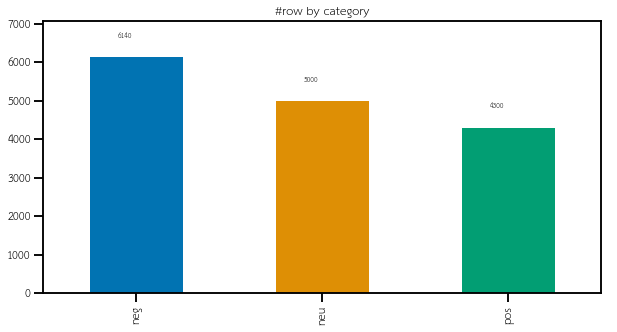

In [30]:
row_count_by_category = sentiment_df.category.value_counts()
ax = row_count_by_category.plot("bar", title="#row by category", figsize=(10, 5))
ax.set_ylim(0, row_count_by_category.max() + row_count_by_category.std())
for i, label in enumerate(row_count_by_category):
    ax.annotate(str(label), (i-0.1, label + 500))

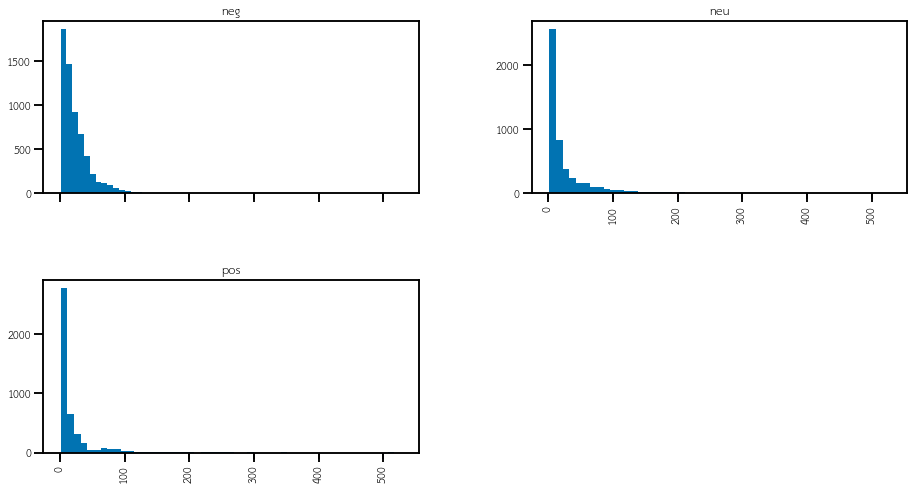

In [31]:
sentiment_df.hist(column="length", by="category", bins=50, figsize=(15, 8), sharex=True)
plt.show()

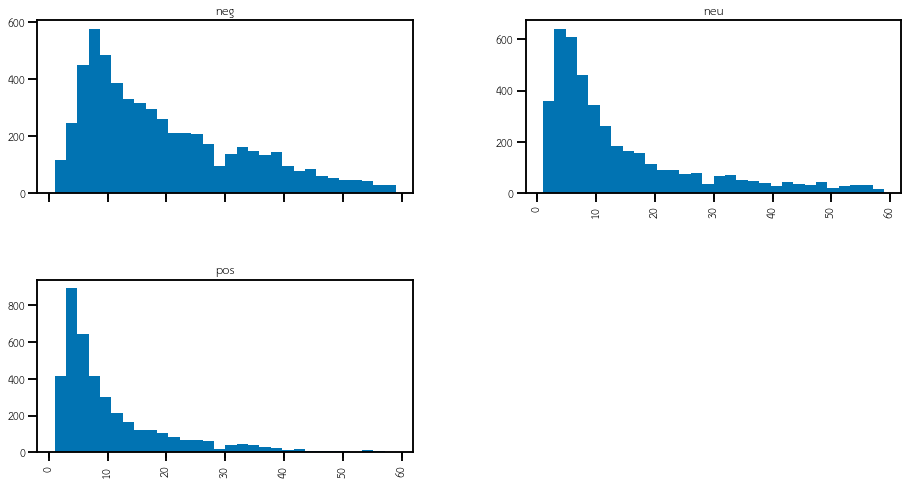

In [32]:
sentiment_df[sentiment_df.length < 60].hist(column="length", by="category", bins=30, figsize=(15, 8), sharex=True)
plt.show()

# Classification

In [33]:
class_names = np.unique(sentiment_df.category).tolist()

## Multinomial Naive Bayes (default parameters)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sentiment_df["texts"], sentiment_df["category"], test_size=0.20, random_state=42)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([
    ("vect", CountVectorizer(tokenizer=process_text, ngram_range=(1,2))),
    ("tfidf", TfidfTransformer()),
    ("clf", MultinomialNB(alpha=0.001)),
])

text_clf.fit(X_train, y_train)
text_clf.score(X_test, y_test)

0.6415155440414507

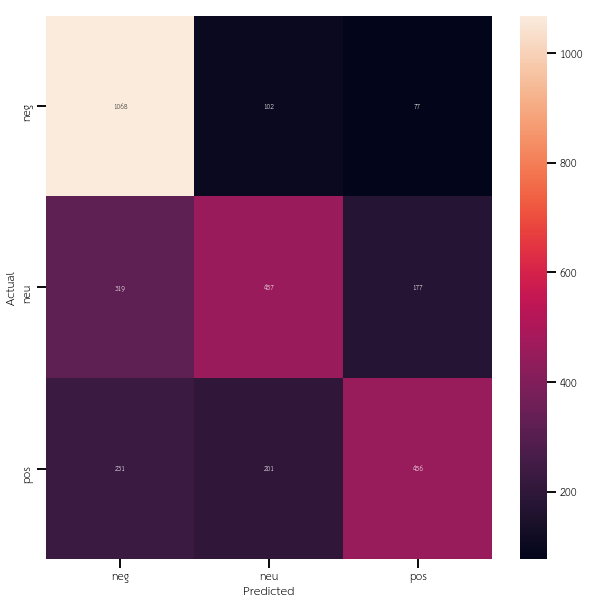

In [36]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, text_clf.predict(X_test))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

#### LIME Explainer

In [37]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=class_names)

In [38]:
idx = sentiment_df.sample(1).index[0]

exp = explainer.explain_instance(sentiment_df.texts[idx], text_clf.predict_proba, num_features=5, top_labels=1)
exp.show_in_notebook()

In [39]:
sentiment_df.iloc[idx]

category    neu             
texts       ฮอนด้า ซีวิค ค่ะ
length      5               
Name: 11581, dtype: object

## Linear SVC (default parameters)

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

svc_clf = Pipeline([
    ("vect", CountVectorizer(tokenizer=process_text, ngram_range=(1,2))),
    ("tfidf", TfidfTransformer()),
    ("clf", LinearSVC()),
])

svc_clf.fit(X_train, y_train)
svc_clf.score(X_test, y_test)

0.6968911917098446

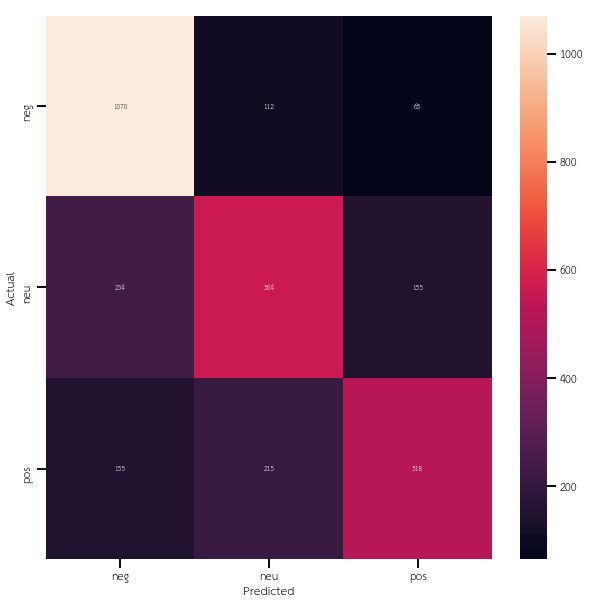

In [41]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, svc_clf.predict(X_test))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()